In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("news.csv")

In [3]:
print(data.shape)
data.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
labels = data.label
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=5)

# TF-IDF and Variable Selection (Pre-Processing)

In [5]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

#Variable Selection
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile = 10)
selector.fit(tfidf_train, y_train)
tfidf_train_trans = selector.transform(tfidf_train).toarray()
tfidf_test_trans = selector.transform(tfidf_test).toarray()

# Passive Agressive Classifier

In [6]:
#PAC with variable selection
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train_trans,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test_trans)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.61%


In [7]:
#PAC without variable selection
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.24%


In [8]:
#DataFlair - Build confusion matrix
print(confusion_matrix(y_test,y_pred, labels=['FAKE','REAL']))

[[600  37]
 [ 36 594]]


# Linear Discriminant Analysis

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(tfidf_train_trans, y_train.ravel())
lda_pred = lda.predict(tfidf_test_trans)
lda_acc = accuracy_score(y_test, lda_pred)
print(lda_acc)

0.7261247040252565


In [10]:
lda_confusion_matrix = confusion_matrix(y_test, lda_pred)
lda_confusion_matrix

array([[476, 161],
       [186, 444]], dtype=int64)

# Quadratic Discriminant Analysis

In [11]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(tfidf_train_trans, y_train.ravel())
qda_pred = qda.predict(tfidf_test_trans)
qda_acc = accuracy_score(y_test, qda_pred)
print(qda_acc)

C:\Users\nicolas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8074191002367798


In [12]:
qda_confusion_matrix = confusion_matrix(y_test, qda_pred)
qda_confusion_matrix

array([[603,  34],
       [210, 420]], dtype=int64)

# Random Forest

In [13]:
rf = RandomForestClassifier()
rf.fit(tfidf_train_trans, y_train)
rf_pred = rf.predict(tfidf_test_trans)
rf_acc = accuracy_score(y_test, rf_pred)
print(rf_acc)

0.9273875295974744


In [14]:
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
rf_confusion_matrix

array([[591,  46],
       [ 46, 584]], dtype=int64)

# Support Vector Machine

In [15]:
svm = SVC()
svm.fit(tfidf_train_trans, y_train)
svm_pred = svm.predict(tfidf_test_trans)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

0.9439621152328335


In [16]:
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
svm_confusion_matrix

array([[607,  30],
       [ 41, 589]], dtype=int64)

# Naive Bayes

In [17]:
nb = GaussianNB()
nb.fit(tfidf_train_trans, y_train)
nb_pred = nb.predict(tfidf_test_trans)
nb_acc = accuracy_score(y_test, nb_pred)
print(nb_acc)

0.8421468034727704


In [18]:
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
svm_confusion_matrix

array([[607,  30],
       [ 41, 589]], dtype=int64)

# Model Comparison (Cross-Validation)

In [19]:
import matplotlib
from sklearn.model_selection import cross_val_score

In [20]:
model_names = {'PAC', 'QDA', 'RF', 'SVM', 'NB'}
models = pd.DataFrame([[0,0,0,0,0]],columns = model_names)
toappend = models
for i in range(9):
    models = models.append(toappend, ignore_index = True)
print(models)

   SVM  PAC  NB  QDA  RF
0    0    0   0    0   0
1    0    0   0    0   0
2    0    0   0    0   0
3    0    0   0    0   0
4    0    0   0    0   0
5    0    0   0    0   0
6    0    0   0    0   0
7    0    0   0    0   0
8    0    0   0    0   0
9    0    0   0    0   0


In [21]:
data = pd.read_csv("news.csv")

In [22]:
text = data['text'] 
labels = data.label

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_x = tfidf_vectorizer.fit_transform(text) 

In [23]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile = 10)
selector.fit(tfidf_x, labels)
tfidf_x_trans = selector.transform(tfidf_x).toarray()

In [24]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac_cv = cross_val_score(pac, tfidf_x_trans, labels, cv=10)

In [25]:
qda = QuadraticDiscriminantAnalysis()
qda_cv = cross_val_score(qda, tfidf_x_trans, labels, cv=10)

C:\Users\nicolas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\nicolas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\nicolas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\nicolas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\nicolas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\nicolas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\nicolas\anaco

In [26]:
rf = RandomForestClassifier()
rf_cv = cross_val_score(rf, tfidf_x_trans, labels, cv=10)

In [27]:
svm = SVC()
svm_cv = cross_val_score(svm, tfidf_x_trans, labels, cv=10)

In [28]:
nb = GaussianNB()
nb_cv = cross_val_score(nb, tfidf_x_trans, labels, cv=10)

In [29]:
models['PAC'] = pac_cv
models['QDA'] = qda_cv
models['RF'] = rf_cv
models['SVM'] = svm_cv
models['NB'] = nb_cv
print(models)

        SVM       PAC        NB       QDA        RF
0  0.951104  0.936909  0.930599  0.834385  0.925868
1  0.947950  0.943218  0.947950  0.861199  0.905363
2  0.930599  0.933754  0.925868  0.842271  0.902208
3  0.949527  0.936909  0.932177  0.845426  0.924290
4  0.941640  0.946372  0.936909  0.837539  0.917981
5  0.928910  0.932070  0.930490  0.857820  0.922591
6  0.954186  0.951027  0.928910  0.848341  0.924171
7  0.954186  0.946288  0.939968  0.864139  0.916272
8  0.947867  0.938389  0.933649  0.860979  0.914692
9  0.935229  0.928910  0.924171  0.843602  0.909953


In [30]:
models.to_csv('model_evaluation_accuracy_table.csv', index = False)

# Boxplot of Each Models' Accuracy

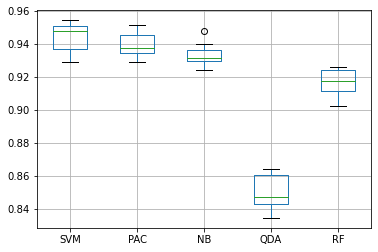

In [31]:
import matplotlib
boxplot = models.boxplot()